In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
RSEED = 50

# Load in data
df = pd.read_csv('../data/train.csv')

In [3]:
from sklearn.model_selection import train_test_split

# Extract the labels
target = np.array(df.pop('target'))

# 30% examples in test data
x_train, x_test, y_train, y_test = train_test_split(df, target, 
                                                    stratify = target,
                                                    test_size = 0.3, 
                                                    random_state = RSEED)

In [4]:
# Train tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RSEED, max_depth=30) #max possible nodes is 53
tree.fit(x_train, y_train)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

print(f'Model Accuracy: {tree.score(x_train, y_train)}')

Decision tree has 36457 nodes with maximum depth 30.
Model Accuracy: 0.9934477064572493


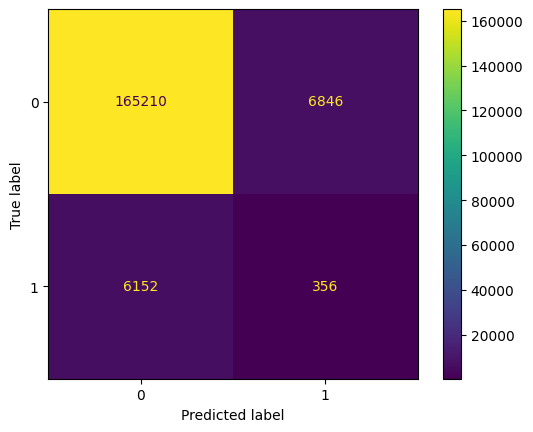

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    172056
           1       0.05      0.05      0.05      6508

    accuracy                           0.93    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.93      0.93    178564



In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

y_pred = tree.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

print(classification_report(y_test, y_pred))

In [8]:
from sklearn.metrics import roc_auc_score

y_probs = tree.predict_proba(x_test)[:, 1]  # probability for the positive class

auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", auc)

ROC AUC: 0.4927722933341781
